In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import matplotlib.pyplot as plt

#   CLASE DATASET  ###############

class x(Dataset):

    def __init__(self):
        xy = np.loadtxt('path-to-data', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # [Etiqueta de clase, Features]
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # Obtener la muestra i-th (index)
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # Longitud de datos
    def __len__(self):
        return self.n_samples

# Tarea de clase:

Rellena las celdas del notebook para un dataset concreto (https://pytorch.org/vision/stable/datasets.html) Image classification, con parámetro "download":

    1. Crear una instancia dataset para train y otra para test.
    2. Crear ambos cargadores de datos.
    3. Muestra las dimensiones del dato 525 y su etiqueta.
    4. Muestra la banda R matplotlib.
    5. Muestra la imagen con matplotlib.
    6. Calcular el valor promedio de cada dato.
    7. Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. ¿Sale la misma desviación?¿El tamaño del dataset ha variado?¿Por qué?

In [ ]:
# 1
transform=torchvision.transforms.ToTensor()


In [ ]:
# 2
dataset_tr = datasets.CIFAR10("/tmp/", train = True, download = True, transform = transform)
dloader_tr = torch.utils.data.DataLoader(dataset_tr, batch_size = 10)
test_loader = torch.utils.data.DataLoader(dataset_tr, batch_size = 6)

train_loader = dloader_tr
print(len(train_loader))
print(len(test_loader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /tmp/cifar-10-python.tar.gz to /tmp/
5000
8334


In [ ]:
# 3. Muestra las dimensiones del dato 525 y su etiqueta.


dato = dataset_tr.__getitem__(525)
tensor, etiqueta = dato
print("Dimension del tensor:",tensor.size() , "       Etiqueta:", etiqueta)


Dimension del tensor: torch.Size([3, 32, 32])        Etiqueta: 6


In [96]:
# bucle sobre dataloader (MNIST tiene 60k samples para training y 10k samples para test)


num_epochs = 1
total_train_samples = len(train_loader.dataset)
total_test_samples  = len(test_loader.dataset)
print(total_train_samples, total_test_samples)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i}| Inputs {inputs.shape} | Labels {labels.shape}')

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch: 1/1, Step 0| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 1| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 2| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 3| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 4| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 5| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 6| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 7| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 8| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 9| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 10| Inputs torch.Size([10, 3, 32, 32]) | Labels torch.Size([10])
Epoch: 1/1, Step 11| Inputs torch.Size([10, 3, 

In [93]:
#5 Imprimir imagen

for images, labels in train_loader:
    image = images[0]
#    image_np = np.transpose(image_np.data.numpy(), (1,2,0))
    image_np = transforms.ToPILImage()(image).convert("RGB")
    plt.imshow(image_np)
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:

#6. Calcular el valor promedio de cada dato.
for i, (inputs, labels) in enumerate(train_loader):
  print(torch.mean(inputs))
  print("---------")
  

Se han truncado las últimas 5000 líneas del flujo de salida.
tensor(0.1822)
---------
tensor(0.1621)
---------
tensor(0.1221)
---------
tensor(0.0744)
---------
tensor(0.0948)
---------
tensor(0.0971)
---------
tensor(0.1575)
---------
tensor(0.1680)
---------
tensor(0.1317)
---------
tensor(0.1422)
---------
tensor(0.1872)
---------
tensor(0.0994)
---------
tensor(0.1150)
---------
tensor(0.1687)
---------
tensor(0.2149)
---------
tensor(0.1749)
---------
tensor(0.0777)
---------
tensor(0.0862)
---------
tensor(0.1973)
---------
tensor(0.1307)
---------
tensor(0.1135)
---------
tensor(0.0826)
---------
tensor(0.1321)
---------
tensor(0.1510)
---------
tensor(0.1317)
---------
tensor(0.1996)
---------
tensor(0.0957)
---------
tensor(0.1365)
---------
tensor(0.1030)
---------
tensor(0.1152)
---------
tensor(0.1036)
---------
tensor(0.1292)
---------
tensor(0.1527)
---------
tensor(0.1478)
---------
tensor(0.1510)
---------
tensor(0.1511)
---------
tensor(0.1539)
---------
tensor(0.1318)

In [94]:
import torch.utils.data as data_utils
dataset_tr = datasets.MNIST("/tmp/",train = 1,download = 1, transform = transform)





Files already downloaded and verified
5000
8334


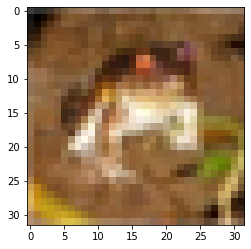

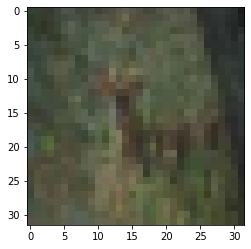

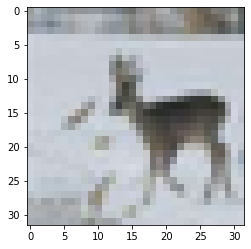

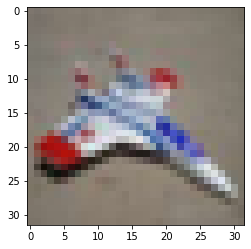

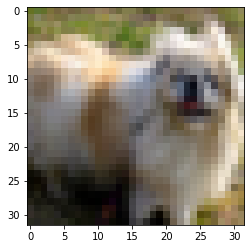

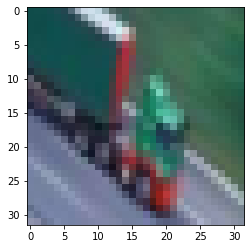

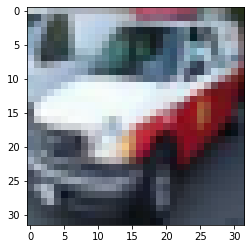

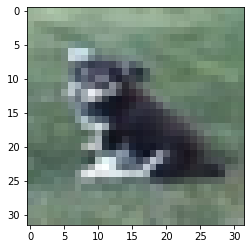

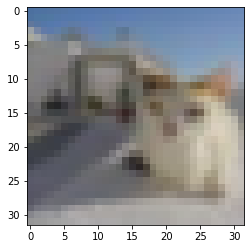

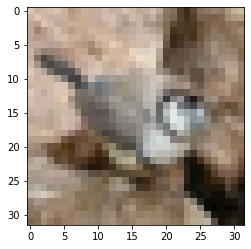

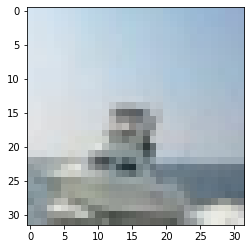

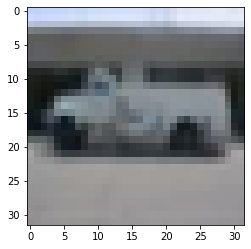

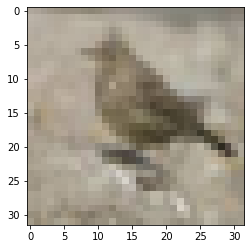

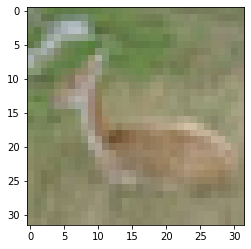

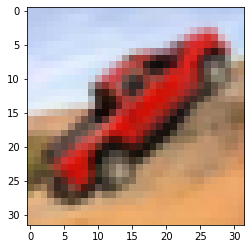

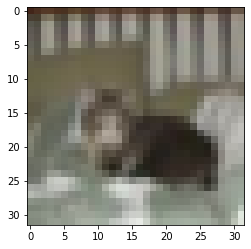

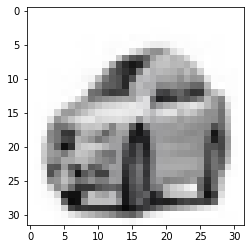

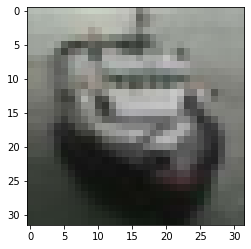

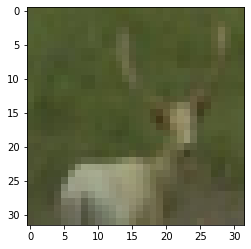

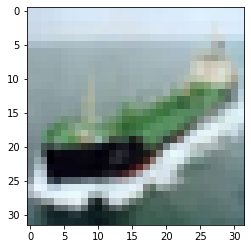

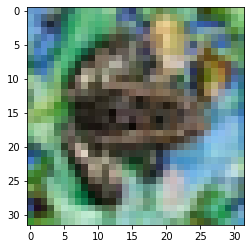

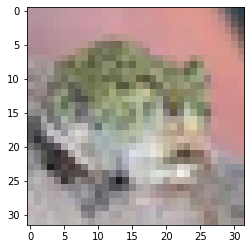

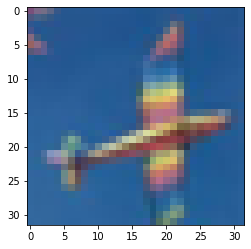

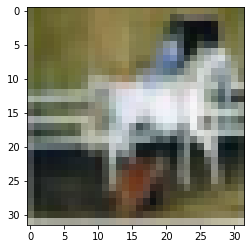

KeyboardInterrupt: ignored

In [97]:
#7. Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. ¿Sale la misma desviación?¿El tamaño del dataset ha variado?¿Por qué?
transform_train = transforms.Compose([
    transforms.RandomCrop(13),
    transforms.ToTensor(),
])
dataset_tr = datasets.CIFAR10("/tmp/", train = True, download = True, transform = transform)
dloader_tr = torch.utils.data.DataLoader(dataset_tr, batch_size = 10)
test_loader = torch.utils.data.DataLoader(dataset_tr, batch_size = 6)

train_loader = dloader_tr
print(len(train_loader))
print(len(test_loader))

for images, labels in train_loader:
    image = images[0]
#    image_np = np.transpose(image_np.data.numpy(), (1,2,0))
    image_np = transforms.ToPILImage()(image).convert("RGB")
    plt.imshow(image_np)
    plt.show()



 ¿Sale la misma desviación?¿El tamaño del dataset ha variado?¿Por qué?

No sale la misma desviación y el dataset ha sido cambiado ya que Ramdomcrop recorta las imagenes del dataset a un tamaño determinado especificado en el parámetro "size" de la función  "transforms.RandomCrop(13)". 